In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA

print("hi")


hi


In [3]:
df = pd.read_csv('copy.csv')

# Step 2: Verify the contents of the DataFrame or its keys (column names)
if df is not None:
    print("Data loaded successfully.")
    print("Column names (keys):", df.keys())
else:
    print("Error loading data from the CSV file.")


Data loaded successfully.
Column names (keys): Index(['Transaction Date ', 'Card Category ', 'Card Type', 'Card Type AR ',
       'Channel ', 'Channel AR ', 'Transaction Type', 'Transaction Type Group',
       'Entry Mode', 'Transaction Status ', 'Outlet ID', ' Merchant Acronym',
       'Merchant Desc', 'Merchant Country', 'Merchant Activity ',
       'Merchant Activity sub ', 'Client Code', 'Amount ', 'Amount USD',
       'Transaction Currency '],
      dtype='object')


In [4]:
numeric_features = df.select_dtypes(include=[float, int])

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(numeric_scaled)
print("hi")

hi


In [5]:
print(X_pca)

[[ 0.55694944 -0.3539903   0.42483718]
 [ 0.53128849 -0.28876598  0.40850294]
 [ 0.10680534 -0.31794647  0.77739908]
 ...
 [-1.04544897  0.52512287 -0.70891762]
 [-1.17343229  0.52893036 -0.5796264 ]
 [-1.19992707  0.52640301 -0.55497102]]


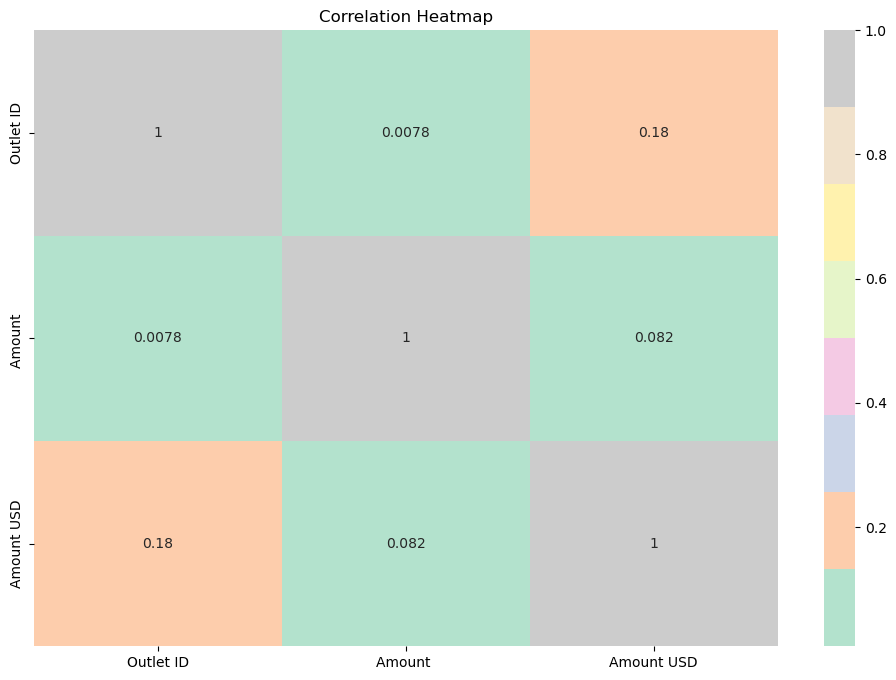

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_csv("./copy.csv")

corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2')

plt.title('Correlation Heatmap')

plt.show()


In [7]:
print(df.head()) # Print the first few rows of the DataFrame
print(df.keys()) # Print the column names of the DataFrame


  Transaction Date  Card Category            Card Type  \
0       31-Mar-2023   Palpay Cards  Visa Classic Debit   
1        7-Apr-2023   Palpay Cards  Visa Classic Debit   
2       19-Apr-2023   Palpay Cards  Visa Classic Debit   
3       18-Apr-2023   Palpay Cards  Visa Classic Debit   
4       30-Mar-2023   Palpay Cards  Visa Classic Debit   

              Card Type AR  Channel       Channel AR  Transaction Type  \
0  ???? ?????? ??? ????????      ATM  ???????? ??????       Withdrawal   
1  ???? ?????? ??? ????????      ATM  ???????? ??????       Withdrawal   
2  ???? ?????? ??? ????????      POS       ???? ?????         Purchase   
3  ???? ?????? ??? ????????      POS       ???? ?????         Purchase   
4  ???? ?????? ??? ????????      ATM  ???????? ??????       Withdrawal   

  Transaction Type Group  Entry Mode Transaction Status   Outlet ID  \
0       ATM Transactions       Other           PROCESSED  150030015   
1       ATM Transactions  Chip & Pin           PROCESSED  400002

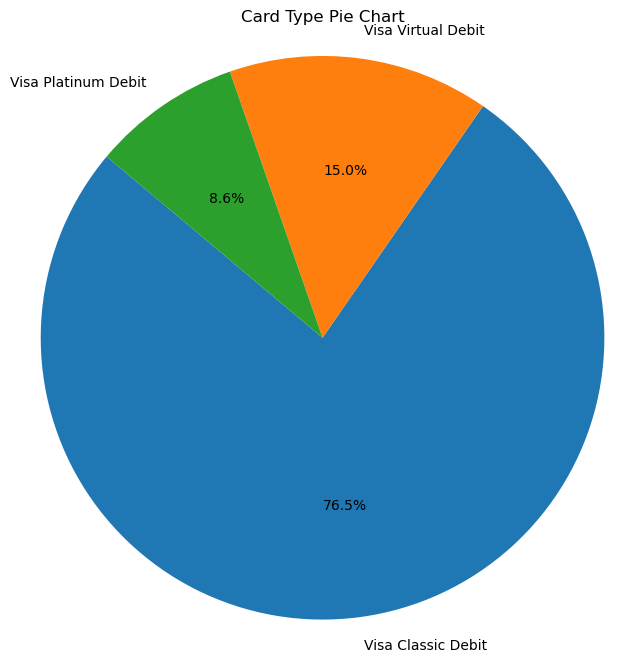

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


card_type_counts = df['Card Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Card Type Pie Chart')
plt.axis('equal')  
plt.show()


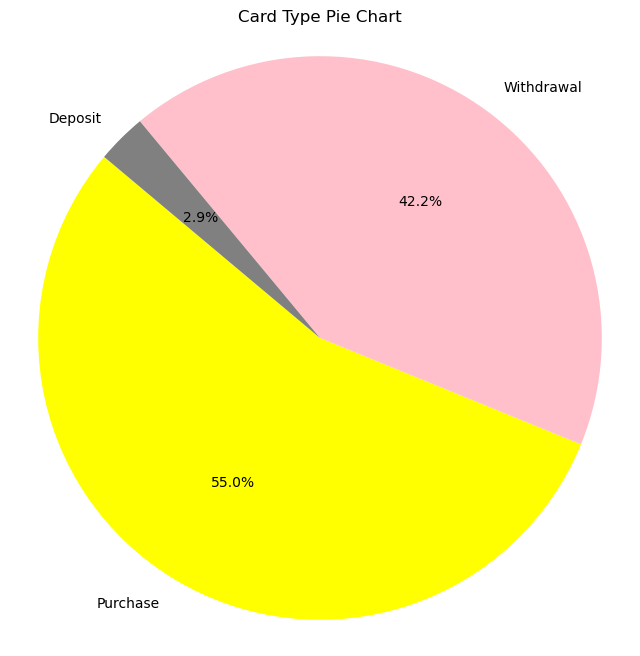

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


card = df['Transaction Type'].value_counts()
custom_colors = ['yellow', 'pink', 'grey']


plt.figure(figsize=(8, 8))
plt.pie(card, labels=card.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Transaction Type Pie Chart')
plt.axis('equal')  
plt.show()
